In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pygsp as pg
from sklearn.cluster import KMeans

In [2]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
flights_clean = pd.read_csv("flights_clean.csv")

adj = np.zeros((322, 322)) # weights are the number of flights
adj_delay = np.zeros((322, 322)) # weights are the average delays
iata = np.array(airports.IATA_CODE);
sub_flights = flights_clean[flights_clean.MONTH==1]
for i in range(sub_flights.shape[0]):
    orig = sub_flights.ORIGIN_AIRPORT.iloc[i]
    dest = sub_flights.DESTINATION_AIRPORT.iloc[i]
    delay = sub_flights.DEPARTURE_DELAY.iloc[i]
    idx1 = np.where(iata==orig)[0]
    idx2 = np.where(iata==dest)[0]
    adj[idx1, idx2] += 1
    adj[idx2, idx1] += 1
    adj_delay[idx1, idx2] += delay
    adj_delay[idx2, idx1] += delay
    
idx = np.where(adj!=0)
adj_delay[idx] = adj_delay[idx] / adj[idx]

In [3]:
adj_delay[adj_delay<=0]=0

In [12]:
G = pg.graphs.Graph(adj)
G_delay =pg.graphs.Graph(adj_delay)

In [16]:
G_delay.compute_fourier_basis()

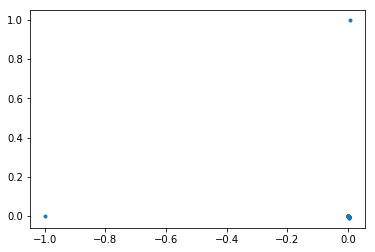

In [22]:
plt.plot(G_delay.U[:,22], G_delay.U[:,23],'.')

In [19]:
G_delay.e

array([ 0.00000000e+00, -4.80813653e-14, -4.05720838e-14, -1.58368130e-14,
       -1.16409168e-14, -9.25587851e-15, -8.51614612e-15, -8.88178420e-16,
       -8.23700893e-16,  2.18403650e-16,  2.51117643e-15,  5.64198552e-15,
        8.38918483e-15,  1.67242867e-14,  2.90122042e-14,  4.29560777e-14,
        8.40972875e-14,  8.69379389e-14,  9.17298145e-14,  1.01725377e-13,
        1.48389894e-13,  1.61708523e-13,  2.14841491e-01,  4.97400577e-01,
        8.36628417e-01,  8.98588910e-01,  1.29528561e+00,  1.32927643e+00,
        1.41513837e+00,  1.57655198e+00,  2.39917918e+00,  2.49167194e+00,
        2.51462002e+00,  2.65905692e+00,  3.19472678e+00,  3.56798624e+00,
        3.86161235e+00,  4.51681078e+00,  4.84662561e+00,  5.03302992e+00,
        5.07964839e+00,  5.10806024e+00,  5.20491013e+00,  5.27033514e+00,
        5.41238510e+00,  5.71465634e+00,  5.72331738e+00,  5.78939746e+00,
        6.05680377e+00,  6.38360690e+00,  6.78077777e+00,  6.90107547e+00,
        7.00410039e+00,  